<a href="https://colab.research.google.com/github/Somtochukwu-Achikanu/Machine-learning-handson/blob/main/Transforming_ad_variables%2C%20quantifying%20and%20visualising%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [ ]:
ads = pd.read_csv('/content/ad_conversion.csv')
print(ads.head())

   spent_usd  n_impressions  n_clicks
0       1.43           7350         1
1       1.82          17861         2
2       1.25           4259         1
3       1.29           4133         1
4       4.77          15615         3


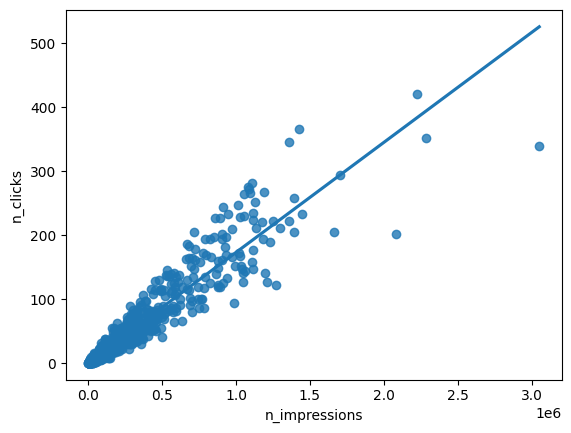

In [ ]:
y='n_clicks'
x='n_impressions'

sns.regplot(y='n_clicks', x='n_impressions', data=ads,ci=None)
plt.show()

In [ ]:
ads['n_clicks_sqrt'] = np.sqrt(ads['n_clicks'])
ads['n_impressions_sqrt']=np.sqrt(ads['n_impressions'])

print(ads.head())

   spent_usd  n_impressions  n_clicks  n_clicks_sqrt  n_impressions_sqrt
0       1.43           7350         1       1.000000           85.732141
1       1.82          17861         2       1.414214          133.645052
2       1.25           4259         1       1.000000           65.261014
3       1.29           4133         1       1.000000           64.288413
4       4.77          15615         3       1.732051          124.959994


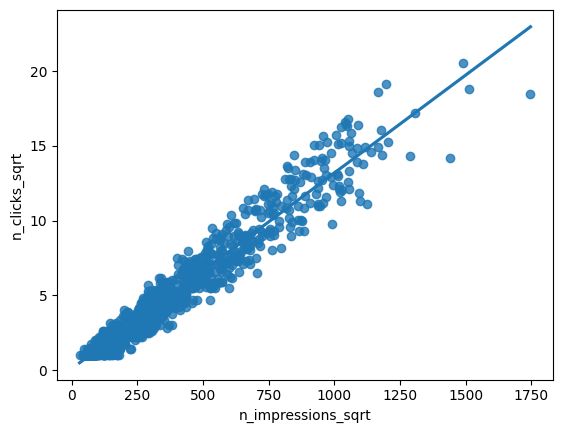

In [ ]:
sns.regplot(x='n_impressions_sqrt', y='n_clicks_sqrt',data=ads, ci=None)
plt.show()

In [ ]:
clicks_vs_impression = ols('n_clicks_sqrt ~ n_impressions_sqrt', data = ads).fit()
print(clicks_vs_impression.params)

Intercept             0.084330
n_impressions_sqrt    0.013096
dtype: float64


Transforming data to power 0.25

In [ ]:
ads['n_clicks_qdrt'] = ads['n_clicks'] ** 0.25
ads['n_impressions_qdrt']=ads['n_impressions'] **0.25

print(ads.head())

   spent_usd  n_impressions  n_clicks  n_clicks_sqrt  n_impressions_sqrt  \
0       1.43           7350         1       1.000000           85.732141   
1       1.82          17861         2       1.414214          133.645052   
2       1.25           4259         1       1.000000           65.261014   
3       1.29           4133         1       1.000000           64.288413   
4       4.77          15615         3       1.732051          124.959994   

   n_clicks_qdrt  n_impressions_qdrt  
0       1.000000            9.259165  
1       1.189207           11.560495  
2       1.000000            8.078429  
3       1.000000            8.018006  
4       1.316074           11.178551  


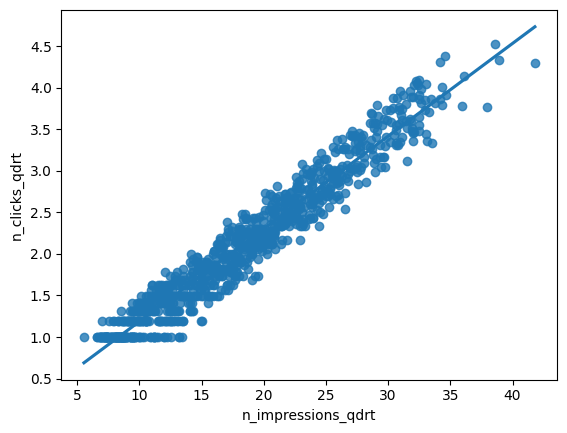

In [ ]:
sns.regplot(x='n_impressions_qdrt', y='n_clicks_qdrt',data=ads, ci=None)
plt.show()

In [ ]:
#Linear regression

clicks_vs_impression = ols('n_clicks_qdrt ~ n_impressions_qdrt',data=ads).fit()
print(clicks_vs_impression.params)

Intercept             0.071748
n_impressions_qdrt    0.111533
dtype: float64


   n_impressions_qdrt  n_impressions  n_clicks_qdrt
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063


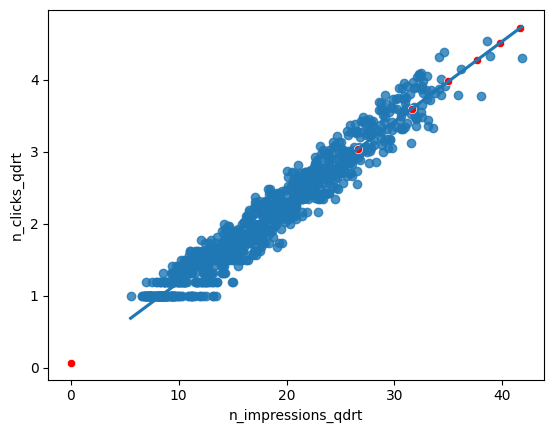

In [ ]:
#Prediction:

explanatory_data = pd.DataFrame({"n_impressions_qdrt": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

predictions = explanatory_data.assign(n_clicks_qdrt = clicks_vs_impression.predict(explanatory_data))
print(predictions.head())

#Back Transform,
predictions['n_clicks'] = predictions['n_clicks_qdrt'] ** 4

#Visualizing the transformed data
fig = plt.figure()
sns.regplot(x="n_impressions_qdrt", y="n_clicks_qdrt", data=ads, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="n_impressions_qdrt", y="n_clicks_qdrt", data=predictions, color='red')
plt.show()

Quantifying my model using coefficient determinant, Rse

In [ ]:
#Checking the summary of both the original and transformed clicks vs impression(qrt)

clicks_vs_impression = ols('n_clicks_qdrt ~ n_impressions_qdrt',data=ads).fit()
print(clicks_vs_impression.summary())



                            OLS Regression Results                            
Dep. Variable:          n_clicks_qdrt   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:26:10   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0

In [ ]:
clicks_vs_impression_original = ols('n_clicks ~ n_impressions', data=ads).fit()
print(clicks_vs_impression_original.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:27:10   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [ ]:
#Printing the coefficient of determinant of both the original and transformed variables
print(clicks_vs_impression_original.rsquared)
print(clicks_vs_impression.rsquared)

0.8916134973508041
0.9445272817143905


A model having a 0.89 coefficient means that the number of impressions explains 89% of the variability in number of clicks

A model having a 0.94 coefficient means that the number of impressions explains 94% of the variability in number of clicks

## **New section**
Calculating the Residual Standard Error(RSE) using Mean squared Error(MSE)

In [ ]:
#RSE of original

mse_original = clicks_vs_impression_original.mse_resid

rse_original = np.sqrt(mse_original)
print('The RSE for original is:', rse_original)

The RSE for original is: 19.905838862478138


The difference between the actual number of clicks and predicted number of clicks is about 20

In [ ]:
mse_trans = clicks_vs_impression.mse_resid

rse_trans = np.sqrt(mse_trans)
print('The RSE for transformed is:', rse_trans)

The RSE for transformed is: 0.19690640896875722


The difference between the actual number of clicks and predicted number of clicks is about 0.2

# **New section**
Visualizing model Fit

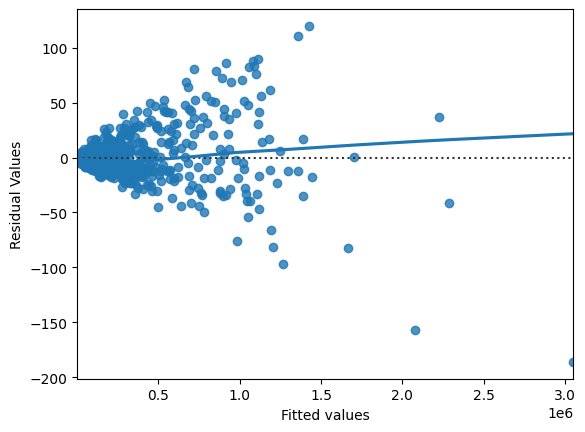

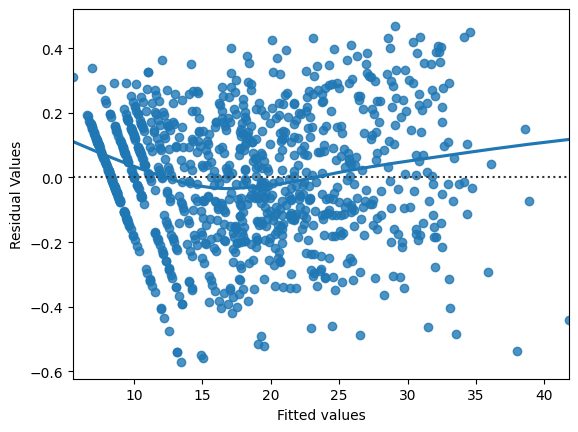

In [21]:
#For original..
sns.residplot(x='n_impressions', y='n_clicks',data = ads,lowess = True)
plt.xlabel('Fitted values')
plt.ylabel('Residual Values')
plt.show()

#For transformed..qrdt
sns.residplot(x="n_impressions_qdrt", y="n_clicks_qdrt", data = ads,lowess = True)
plt.xlabel('Fitted values')
plt.ylabel('Residual Values')
plt.show()

Explanation: The residuals track the
 line more closely in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data.

## **QQplot**

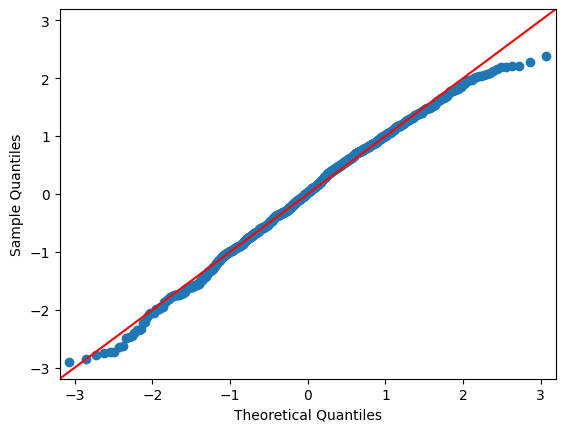

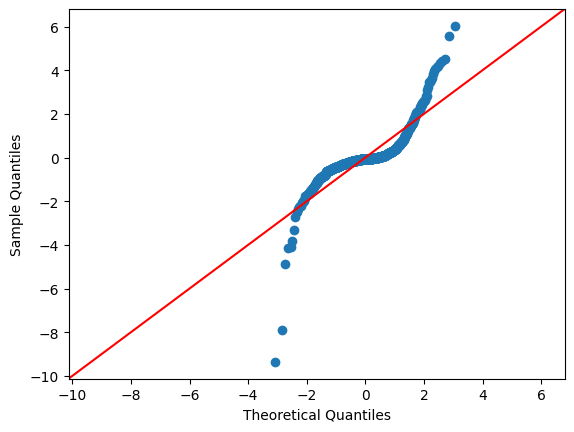

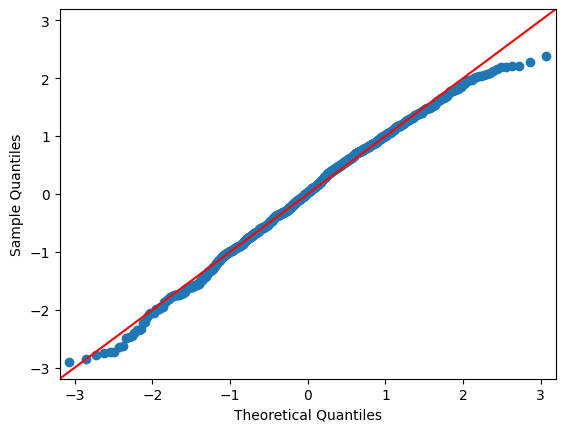

In [27]:
from statsmodels.api import qqplot

#Original model
qqplot(clicks_vs_impression_original.resid, line ='45', fit=True)


#For transformed model
qqplot(clicks_vs_impression.resid, line='45',fit=True)

Summary of the plot above:

The residuals track the "normality" line more closely in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data.


# **Scale location plot**

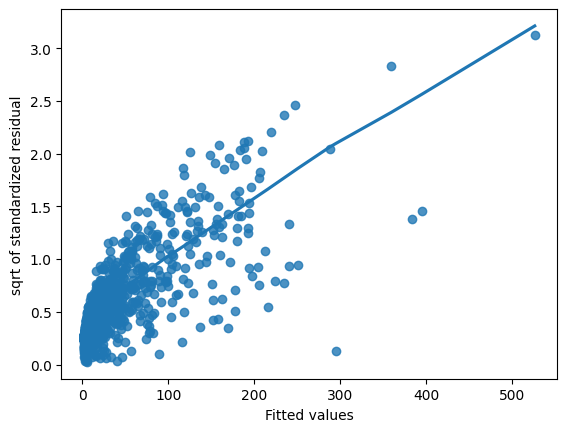

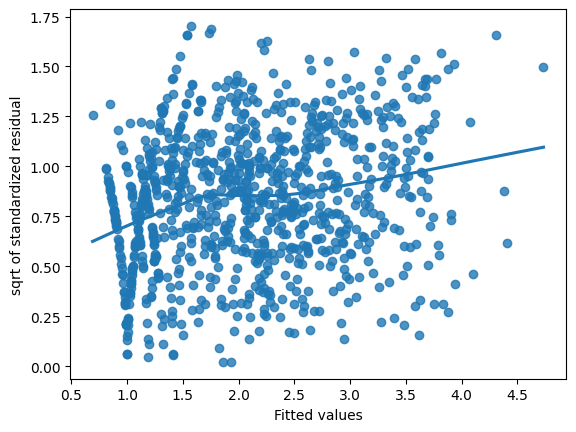

In [30]:
#For Original

model_norm_residual_original = clicks_vs_impression_original.get_influence().resid_studentized_internal
model_norm_residual_abs_sqrt_original = np.sqrt(np.abs(model_norm_residual_original))
sns.regplot(x =clicks_vs_impression_original.fittedvalues, y = model_norm_residual_abs_sqrt_original, ci=None,lowess =True)
plt.xlabel('Fitted values')
plt.ylabel('sqrt of standardized residual')
plt.show()

#For Transformed Data
model_norm_residual_trans = clicks_vs_impression.get_influence().resid_studentized_internal
model_norm_residual_abs_sqrt_trans = np.sqrt(np.abs(model_norm_residual_trans))
sns.regplot(x =clicks_vs_impression.fittedvalues, y = model_norm_residual_abs_sqrt_trans, ci=None,lowess =True)
plt.xlabel('Fitted values')
plt.ylabel('sqrt of standardized residual')
plt.show()

Summary: The size of the standardized residuals is more consistent in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data.